In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
%matplotlib inline

In [2]:
# digest csv files
goldbees_df = pd.read_csv('data/goldbees.csv', parse_dates=['date'])
gold_df = pd.read_csv('data/xauinr.csv', parse_dates=['date'])

In [3]:
# Data cleaning. Both files have monthly data but started at different time
# To compare we have to fix some time period. So lets do for past 10yrs
comp_df = goldbees_df[['date', 'close']][goldbees_df.date > '2011/07/01']
comp_df.reset_index(drop=True, inplace=True)
comp_df.rename(columns={
    'close': 'goldbees_price'
}, inplace = True)
comp_df['gold_price'] = gold_df[['close']]

In [4]:
# Calcualte %change to prev day price and put in separate column
comp_df['goldbees_change'] = comp_df.goldbees_price.pct_change() * 100
comp_df['gold_change'] = comp_df.gold_price.pct_change() * 100

In [5]:
performance = (comp_df.goldbees_change.sum(), comp_df.gold_change.sum())
performance

(71.93837085671419, 73.92374777474542)

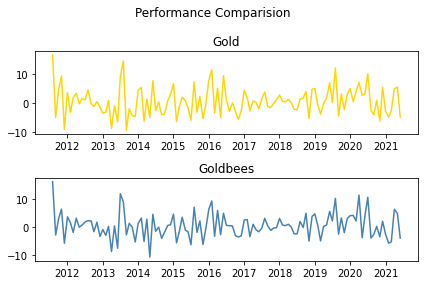

In [6]:
# Plot the graphs - date vs change% from comp_df
fig, (s1, s2) = plt.subplots(2, 1) # subplot(row, col)

s1.set_title('Gold')
s1.plot(comp_df['date'], comp_df['gold_change'], color='#FFD700')


s2.set_title('Goldbees')
s2.plot(comp_df['date'], comp_df['goldbees_change'], color='#4682b4')

fig.suptitle('Performance Comparision')
fig.tight_layout()
fig.savefig('out/monthly_changes.png', dpi=200)

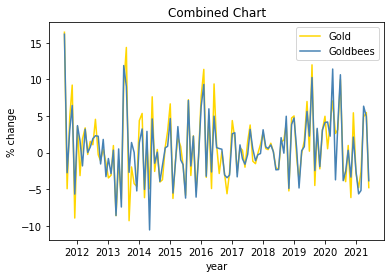

In [7]:
plt.plot(comp_df['date'], comp_df['gold_change'], label='Gold', color='#FFD700')
plt.plot(comp_df['date'], comp_df['goldbees_change'], label='Goldbees', color='#4682b4')
plt.xlabel('year')
plt.ylabel('% change')
plt.legend()
plt.title('Combined Chart')
plt.savefig('out/combined_chart.png', dpi=200)